# 소득과 부동산 가격 비교

### 개인소득과 PIR데이터를 파이썬으로 비교

데이터프레임을 만드는 데 필요한 모듈과 그래프를 그리는데 필요한 모듈들과 한글이 깨지지 않도록 설정한다.

In [1]:
# 기본설정

import pandas as pd
import xlwings as xw

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 맥 OS인 경우 위 두 줄을 입력하지 않고 아래 코드를 입력하면 된다.
# rc('font', family='AppleGothc')
plt.rcParams['axes.unicode_minus'] = False

### 소득 데이터를 읽어와 데이터 프레임으로 정리

In [4]:
# 소득 데이터 읽어오기
path = r'데이터\시도별_1인당_지역내총생산__지역총소득__개인소득_20200921140817.xlsx'
raw = pd.read_excel(path, sheet_name='데이터', index_col=0)

raw

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
시도별,,,,,,,,,,,,,,,,,,,
시도별,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득,1인당 개인소득
전국,8694,9120,9820,10389,11063,11551,12058,12636,13425,13811,14558,15137,15711,16432,17006,18063,18520,19204,19910
서울특별시,9978,10511,11463,12285,13044,13525,14008,15023,15783,16080,17277,18252,18795,19525,19832,20857,21295,22237,23323
부산광역시,8296,8584,9330,9685,10164,10695,11323,11855,12699,12993,13605,14396,15098,15651,16147,17044,17525,18189,18868
대구광역시,8274,8622,9246,9494,10052,10693,11193,11503,12279,12851,13446,13969,14554,15320,16031,17226,17848,18350,18555
인천광역시,7651,7997,8700,9280,9937,10344,10769,11151,11843,12334,13214,13600,14181,14829,15507,16598,17222,17884,18659
광주광역시,7969,8540,9011,9610,10103,10865,11389,12137,12902,13298,13439,13815,14662,15454,16225,17459,18232,18926,19868
대전광역시,8230,8658,9288,10072,10563,11133,11755,12339,13070,13701,14373,14992,15537,16253,16946,18229,18741,19314,19649
울산광역시,10271,11012,11896,12603,13422,14129,14426,15502,16438,16950,17634,18594,18941,19782,20142,21348,21422,21956,21655


In [5]:
# 첫번째 행을 제거해준다.

raw.drop(['시도별'], inplace=True)

시도 이름을 약어로 바꾼다. 서울시 -> 서울, 경기도 -> 경기, 경상북도 -> 경북 으로 변경

In [7]:
# 인덱스의 시도 이름을 약어로 변경하기

index_list = raw.index
new_index = []
for temp in index_list:
    if temp[-1] == '시':
        new_index.append(temp[:2])
    elif temp[-1] == '도':
        if len(temp) == 3:
            new_index.append(temp[:2])
        elif len(temp) == 4:
            new_index.append(temp[0] + temp[2])
        else:
            new_index.append('제주')
    else:
        new_index.append(temp)
        
raw.index = new_index

인덱스가 '시도'로 돼 있고 컬럼이 '연도'로 돼 있는 데이터프레임의 구조를 변경해서 인덱스를 '연도'로 설정하고 컬럼을 '시도'로 설정한다. 데이터프레임의 행(인덱스)과 열(컬럼)을 서로 바꾸는 것은 T 라는 명령어를 사용한다.

In [20]:
# 컬럼과 인덱스 서로 바꾸기

income_data = raw.T

income_data

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
2000,8694,9978,8296,8274,7651,7969,8230,10271,-,9142,7442,7694,8035,7684,7714,8116,8217,8259
2001,9120,10511,8584,8622,7997,8540,8658,11012,-,9422,7850,8192,8349,8189,8142,8611,8743,8729
2002,9820,11463,9330,9246,8700,9011,9288,11896,-,10122,8491,8658,8929,8517,8716,9207,9291,9314
2003,10389,12285,9685,9494,9280,9610,10072,12603,-,10608,8960,9030,9454,9242,9219,9593,9912,9679
2004,11063,13044,10164,10052,9937,10103,10563,13422,-,11299,9589,9758,10075,9844,10036,10315,10636,10082
2005,11551,13525,10695,10693,10344,10865,11133,14129,-,11622,10036,10403,10417,10448,10644,10946,11101,10552
2006,12058,14008,11323,11193,10769,11389,11755,14426,-,12196,10530,10840,10994,10922,11110,11202,11611,11125
2007,12636,15023,11855,11503,11151,12137,12339,15502,-,12740,10863,11247,11365,11387,11424,11391,11967,11544
2008,13425,15783,12699,12279,11843,12902,13070,16438,-,13581,11683,11983,12006,12060,12013,12156,12970,12411
2009,13811,16080,12993,12851,12334,13298,13701,16950,-,13760,12330,12615,12660,12649,12643,12657,13316,12809


### 소득 데이터 전처리 과정 함수화

In [21]:
# 소득 데이터 전처리 과정 함수화
def income_preprocessing(path):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    
    raw = pd.read_excel(path)
    raw.drop([0], inplace=True)
    raw.set_index('시도별', inplace=True)
    index_list = raw.index
    new_index = []
    for temp in index_list:
        if temp[-1] == '시':
            new_index.append(temp[:2])
        elif temp[-1] == '도':
            if len(temp) == 3:
                new_index.append(temp[:2])
            elif len(temp) == 4:
                new_index.append(temp[0] + temp[2])
            else:
                new_index.append('제주')
        else:
            new_index.append(temp)
        
    raw.index = new_index
    income_data = raw.T
    return income_data

income_data_path = r'데이터\시도별_1인당_지역내총생산__지역총소득__개인소득_20200921140817.xlsx'
income_data = income_preprocessing(income_data_path)

### 부동산 가격지수 데이터 가져오기

소득 데이터를 얻은 후 부동산 가격과 비교하기 위해 KBpriceindex_preprocessing 함수를 이용해 부동산 가격지수 데이터를 가져온다.

In [24]:
def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : 시트 name
    # data_type : '매매종합', '매매 APT', '매매연립', '매매단독', '전세종합' \
                         #  ,전세 APT', '전세연립', '전세단독' 중 하나
    
    wb = xw.Book(path)
    sheet = wb.sheets[data_type]
    row_num = sheet.range(1,1).end('down').end('down').end('down').row
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기'
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1]) # 필요없는 행을 지워준다.
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12:
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    #axis = 0 : 행방향동작 , axis = 1 : 열방향 동작
    cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

In [26]:
path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
data_type = '매매종합'
price_data = KBpriceindex_preprocessing(path, data_type)

### 특정 지역의 개인 소득과 부동산 가격지수를 비교

선택된 지역에서 개인소득과 부동산 가격지수의 변화를 비교해서 subplot으로 출력한다.

부동산 가격지수와 소득 데이터를 함께 이용해 그린다. 주의해야할 점은 부동산 가격지수의 데이터는 월 간격으로 주어져 있고, 소득 데이터는 연 간격으로 주어져 있다. 부동산 가격지수와 소득 데이터를 한 번에 나타내려면 두 데이터의 간격을 모두 년(year)단위로 맞추어야 한다. 이를 위해 year_data 라는 빈 리스트를 만든다.

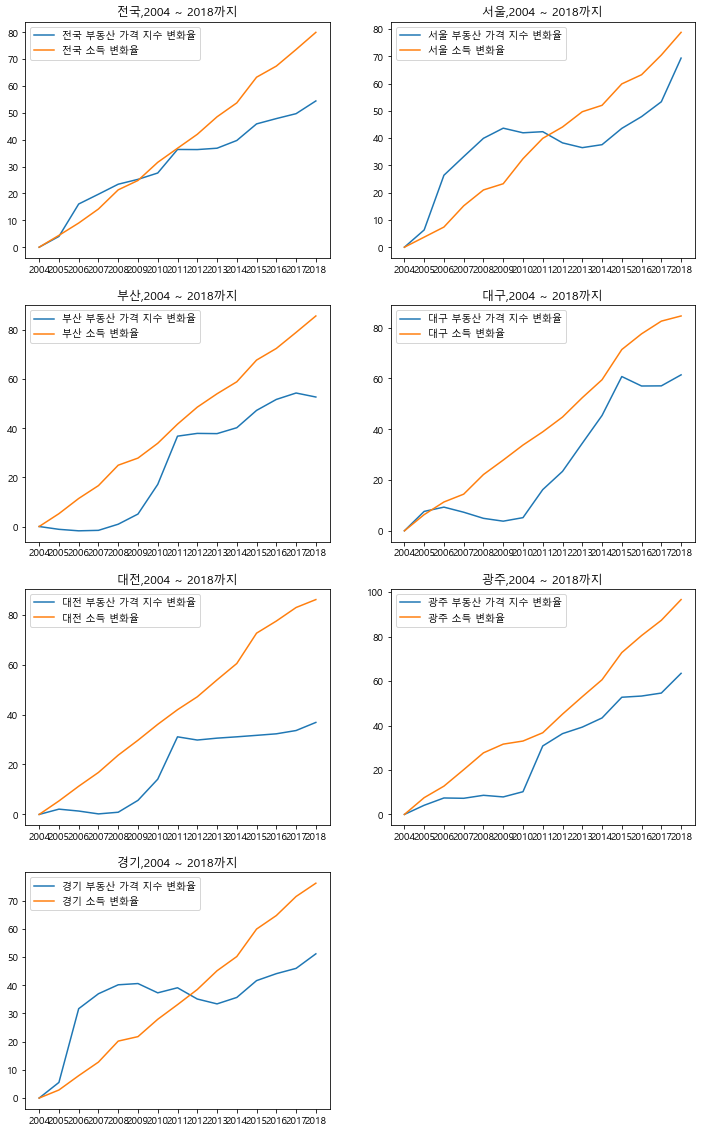

In [28]:
# 특정 지역들의 부동산 가격지수 변화와 개인소득 변화를 subplot으로 출력

location_list = ['전국', '서울', '부산', '대구', '대전', '광주', '경기']
start_year = '2004'
end_year = '2018'

num_row = int((len(location_list)-1)/2)+1
plt.figure(figsize=(12, num_row*5))
for j, location in enumerate(location_list):
    year_data = []
    for i in range(int(start_year), int(end_year) + 1):
        if location == '제주도':
            year_data.append(price_data[location]['서귀포'][str(i)+'.12.1'])
        else:
            year_data.append(price_data[location][location][str(i)+'.12.1'])
            
    temp_df = pd.DataFrame(income_data[location][start_year:end_year])
    temp_df.columns = [location + '소득']
    temp_df[location + '부동산 가격지수'] = year_data
    temp_df['소득 변화율'] = (temp_df[location + '소득']/temp_df[location + '소득'][0] - 1) * 100
    temp_df['부동산 가격 지수 변화율'] = (temp_df[location + '부동산 가격지수'] / temp_df[location + '부동산 가격지수'][0] - 1) * 100
    
    plt.subplot(num_row, 2, j+1)
    plt.title(location + ',' + start_year + ' ~ ' + end_year + '까지')
    plt.plot(temp_df['부동산 가격 지수 변화율'], label=location + ' 부동산 가격 지수 변화율')
    plt.plot(temp_df['소득 변화율'], label=location + ' 소득 변화율')
    plt.legend()

### PIR(Price Income Ratio) 데이터 읽어오기

In [40]:
path = r'데이터\★(월간)KB주택가격동향_시계열(2020.08).xlsx'
wb = xw.Book(path)
sheet = wb.sheets['PIR(월별)']
row_num = sheet.range('J2').end('down').row
data_range = 'B2:N' + str(row_num)
pir_rawdata = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

In [45]:
pir_rawdata.columns

Index([           None,            None,            None, '전국 All cities',
                  None,            None,            None,            None,
            '서울 Seoul',            None,            None,            None,
                  None],
      dtype='object')

### PIR 데이터프레임 컬럼 정리

현재 데이터는 크게 전국(All cites)와 서울(Seoul)로 나뉘어 있다. 그리고 '전국'과 '서울' 카테고리 아래에 각각 가구 연소득 카테고리가 1분위에서 5분위까지 나뉘어 있다. 따라서이를 이중 컬럼으로 만들어서 먼저 큰 범위의 컬럼에서 '전국'과 서울을 선택할 수 있게 하고 그 아래에서 연소득 분위를 선택할 수 있게 만들면 계층적으로 잘 정리된 컬럼이 된다.

In [50]:
# 지역을 구분하는 상위 컬럼 만들기
big_col = list(pir_rawdata.columns)
big_col[0] = 'index1'
big_col[1] = 'index2'
big_col[2] = 'index3'

for num, col in enumerate(big_col):
    if col == None:
        big_col[num] = big_col[num - 1]
    else:
        pass
print(big_col)

['index1', 'index2', 'index3', '전국 All cities', '전국 All cities', '전국 All cities', '전국 All cities', '전국 All cities', '서울 Seoul', '서울 Seoul', '서울 Seoul', '서울 Seoul', '서울 Seoul']


이중 하위 컬럼을 만든다. 하위 컬럼은 pir_rawdata 에서 2번째 행을 그대로 이용한다.

In [51]:
# 소득 분위를 나타내는 하위 컬럼 만들기

small_col = list(pir_rawdata.loc[1])
small_col[0] = 'index1'
small_col[1] = 'index2'
small_col[2] = 'index3'

이중 컬럼의 형태로 데이터프레임에 설정하고, 필요 없는 첫 번째와 두 번째 행을 삭제한다. 

In [52]:
# 이중 컬럼 설정

pir_rawdata.columns = [big_col, small_col]
pir_rawdata.drop([0,1], inplace=True)

In [54]:
pir_rawdata

index1                        index2 index3 전국 All cities           \
       index1                        index2 index3           1분위      2분위   
2    '08.12\n  평균\n주택가격\nMean Housing Price    1분위       5.44195  2.64564   
3        None                          None    2분위       9.77107  4.75028   
4        None                          None    3분위       15.3718  7.47314   
5        None                          None    4분위       24.0716  11.7026   
6        None                          None    5분위       45.7185  22.2264   
..        ...                           ...    ...           ...      ...   
662        12  평균\n주택가격\nMean Housing Price    1분위       7.05293  3.17531   
663      None                          None    2분위       12.1507   5.4704   
664      None                          None    3분위        17.653  7.94758   
665      None                          None    4분위       26.5425  11.9497   
666      None                          None    5분위       49.6731  22.3634   

                                서울 Seoul                                      
         3분위      4분위       5분위      1분위      2분위      3분위      4분위      5분위  
2    1.85809  1.38628  0.837666  16.7368  8.30789  5.85687  4.38202  2.65692  
3    3.33623  2.48908   1.50404  25.9676  12.8899  9.08707   6.7988  4.12227  
4    5.24855  3.91582   2.36615  33.9684  16.8614  11.8869  8.89358  5.39238  
5    8.21899    6.132   3.70528  43.5412  21.6131  15.2368  11.3999  6.91203  
6    15.6101  11.6463   7.03734  72.6804  36.0774  25.4337  19.0291  11.5378  
..       ...      ...       ...      ...      ...      ...      ...      ...  
662  2.17573  1.59849  0.987041  20.0162  9.12739  6.30968  4.62371  2.85957  
663  3.74832  2.75387   1.70047  35.0636   15.989  11.0531  8.09965   5.0093  
664  5.44568  4.00091   2.47049  45.9564  20.9561  14.4868  10.6159  6.56547  
665  8.18797  6.01566   3.71456  63.0093  28.7323  19.8623  14.5551   9.0017  
666  15.3234   11.258   6.95164  108.987  49.6983  34.3559  25.1759  15.5703  

[665 rows x 13 columns]

### PIR 데이터프레임 인덱스 정리

현재 인덱스는 0,1,2,... 로 번호만 부여돼 있다. 이를 index1 컬럼에 있는 날짜를 상위로 하고 index3에 있는 평균주택가격 분위를 하위로 하는 이중 인덱스 구조로 만든다.

index1은 날짜와 None이 있는데 이를 연도.월 형식으로 바꾸어 준다.

In [55]:
print(pir_rawdata['index1']['index1'])

2      '08.12\n
3          None
4          None
5          None
6          None
         ...   
662          12
663        None
664        None
665        None
666        None
Name: index1, Length: 665, dtype: object


In [56]:
# 상위 인덱스 설정

big_index = list(pir_rawdata['index1']['index1'])
for num, index in enumerate(big_index):
    if index is not None:
        if type(index) == str:
            big_index[num] = '20' + index.split(".")[0][1:] + '.' + index.split(".")[1][:2]
        else:
            big_index[num] = big_index[num - 1].split(".")[0] + "." + str(int(index))
    else:
        big_index[num] = big_index[num - 1]

In [58]:
print(big_index)

['2008.12', '2008.12', '2008.12', '2008.12', '2008.12', '2009.1', '2009.1', '2009.1', '2009.1', '2009.1', '2009.2', '2009.2', '2009.2', '2009.2', '2009.2', '2009.3', '2009.3', '2009.3', '2009.3', '2009.3', '2009.4', '2009.4', '2009.4', '2009.4', '2009.4', '2009.5', '2009.5', '2009.5', '2009.5', '2009.5', '2009.6', '2009.6', '2009.6', '2009.6', '2009.6', '2009.7', '2009.7', '2009.7', '2009.7', '2009.7', '2009.8', '2009.8', '2009.8', '2009.8', '2009.8', '2009.9', '2009.9', '2009.9', '2009.9', '2009.9', '2009.10', '2009.10', '2009.10', '2009.10', '2009.10', '2009.11', '2009.11', '2009.11', '2009.11', '2009.11', '2009.12', '2009.12', '2009.12', '2009.12', '2009.12', '2010.1', '2010.1', '2010.1', '2010.1', '2010.1', '2010.2', '2010.2', '2010.2', '2010.2', '2010.2', '2010.3', '2010.3', '2010.3', '2010.3', '2010.3', '2010.4', '2010.4', '2010.4', '2010.4', '2010.4', '2010.5', '2010.5', '2010.5', '2010.5', '2010.5', '2010.6', '2010.6', '2010.6', '2010.6', '2010.6', '2010.7', '2010.7', '2010.7',

하위 인덱스인 '평균 주택 가격 분위'를 설정한다. index3를 조작없이 사용하면 된다.

In [60]:
# 하위 인덱스 및 이중 인덱스 설정

small_index = list(pir_rawdata['index3']['index3'])
pir_rawdata.index = [pd.to_datetime(big_index), small_index]

del pir_rawdata['index1']
del pir_rawdata['index2']
del pir_rawdata['index3']

pir_rawdata.index.names = ['날짜', '평균주택가격']

In [61]:
pir_rawdata

전국 All cities                                      서울 Seoul  \
                            1분위      2분위      3분위      4분위       5분위      1분위   
날짜         평균주택가격                                                               
2008-12-01 1분위          5.44195  2.64564  1.85809  1.38628  0.837666  16.7368   
           2분위          9.77107  4.75028  3.33623  2.48908   1.50404  25.9676   
           3분위          15.3718  7.47314  5.24855  3.91582   2.36615  33.9684   
           4분위          24.0716  11.7026  8.21899    6.132   3.70528  43.5412   
           5분위          45.7185  22.2264  15.6101  11.6463   7.03734  72.6804   
...                         ...      ...      ...      ...       ...      ...   
2019-12-01 1분위          7.05293  3.17531  2.17573  1.59849  0.987041  20.0162   
           2분위          12.1507   5.4704  3.74832  2.75387   1.70047  35.0636   
           3분위           17.653  7.94758  5.44568  4.00091   2.47049  45.9564   
           4분위          26.5425  11.9497  8.18797  6.01566   3.71456  63.0093   
           5분위          49.6731  22.3634  15.3234   11.258   6.95164  108.987   

                                                       
                       2분위      3분위      4분위      5분위  
날짜         평균주택가격                                      
2008-12-01 1분위     8.30789  5.85687  4.38202  2.65692  
           2분위     12.8899  9.08707   6.7988  4.12227  
           3분위     16.8614  11.8869  8.89358  5.39238  
           4분위     21.6131  15.2368  11.3999  6.91203  
           5분위     36.0774  25.4337  19.0291  11.5378  
...                    ...      ...      ...      ...  
2019-12-01 1분위     9.12739  6.30968  4.62371  2.85957  
           2분위      15.989  11.0531  8.09965   5.0093  
           3분위     20.9561  14.4868  10.6159  6.56547  
           4분위     28.7323  19.8623  14.5551   9.0017  
           5분위     49.6983  34.3559  25.1759  15.5703  

[665 rows x 10 columns]

칼럼은 기준으로 '서울' 지역의 중간 소득층의 '3분위' 가구의 PIR 값들을 시계열로 보기 위해 다음과 같은 명령어를 실행한다.

In [63]:
pir_rawdata.xs('3분위', level='평균주택가격')

전국 All cities                                     서울 Seoul  \
                     1분위      2분위      3분위      4분위      5분위      1분위   
날짜                                                                      
2008-12-01       15.3718  7.47314  5.24855  3.91582  2.36615  33.9684   
2009-01-01       16.1499  7.47533  5.16789   3.7696  2.18144  36.6966   
2009-02-01       16.0198  7.41512  5.12626  3.73924  2.16387  36.7269   
2009-03-01        15.955   7.3851  5.10551   3.7241  2.15511  36.5496   
2009-04-01       15.3934  7.25673  5.14141   3.8634  2.41433     35.8   
...                  ...      ...      ...      ...      ...      ...   
2019-08-01       16.8772  7.77839  5.37032  3.92888  2.36687  42.2039   
2019-09-01       16.9058   7.7916  5.37944  3.93556  2.37089  42.5718   
2019-10-01        17.544  7.89849  5.41205   3.9762  2.45523  44.3677   
2019-11-01       17.5387  7.89614  5.41043  3.97502   2.4545  44.8169   
2019-12-01        17.653  7.94758  5.44568  4.00091  2.47049  45.9564   

                                                
                2분위      3분위      4분위      5분위  
날짜                                              
2008-12-01  16.8614  11.8869  8.89358  5.39238  
2009-01-01  17.1816  11.8389   8.6373  4.97549  
2009-02-01  17.1958  11.8487  8.64443   4.9796  
2009-03-01  17.1128  11.7915  8.60271  4.95556  
2009-04-01  16.9669  11.9966  9.01949  5.62434  
...             ...      ...      ...      ...  
2019-08-01  19.6694  13.6794  9.95157  5.99605  
2019-09-01  19.8408  13.7987  10.0383  6.04832  
2019-10-01  20.2317   13.986  10.2489  6.33851  
2019-11-01  20.4366  14.1276  10.3527  6.40269  
2019-12-01  20.9561  14.4868  10.6159  6.56547  

[133 rows x 10 columns]

### 서울 지역 각 소득 분위의 2분위 주택가격 PIR을 그래프로 나타내기

'평균주택가격' 인덱스에서 '3 분위'를 지정하고, 이어서 지역을 선택한다. 전국의 경우를 보고 싶으면 location 변수에 '전국 All cities'를 입력한다. for 문을 이용해 각 소득의 분위의 데이터를 가져와 선형 그래프로 나타낸다.

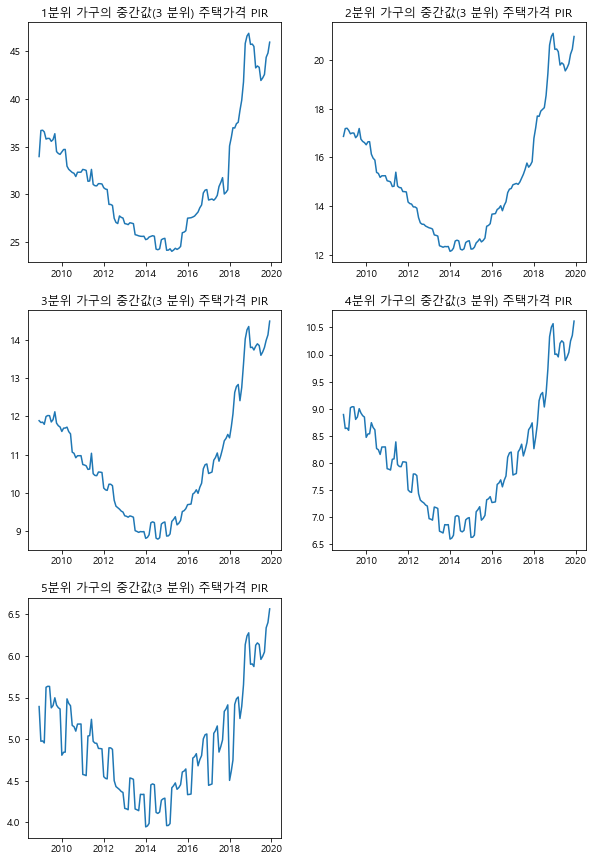

In [64]:
# 서울 각 소득 분위의 3분위 주택가격 시계열 subplot으로 나타내기

gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(3 분위) 주택가격 PIR")
    plt.plot(pir_rawdata.xs('3분위', level='평균주택가격')[location][gagu])
    
plt.show()

### PIR 그래프에 평균 PIR 값 추가

단순히 PIR 시계열 데이터만으로 현재 PIR 값이 높은지 낮은지 판단하기 쉽지 않다. 장기 평균 데이터가 주어진다면 현재의 값의 위치에 대한 판단이 훨씬 수월할 것이다. 위의 코드에 장기 평균을 계산하는 코드만 추가한다.

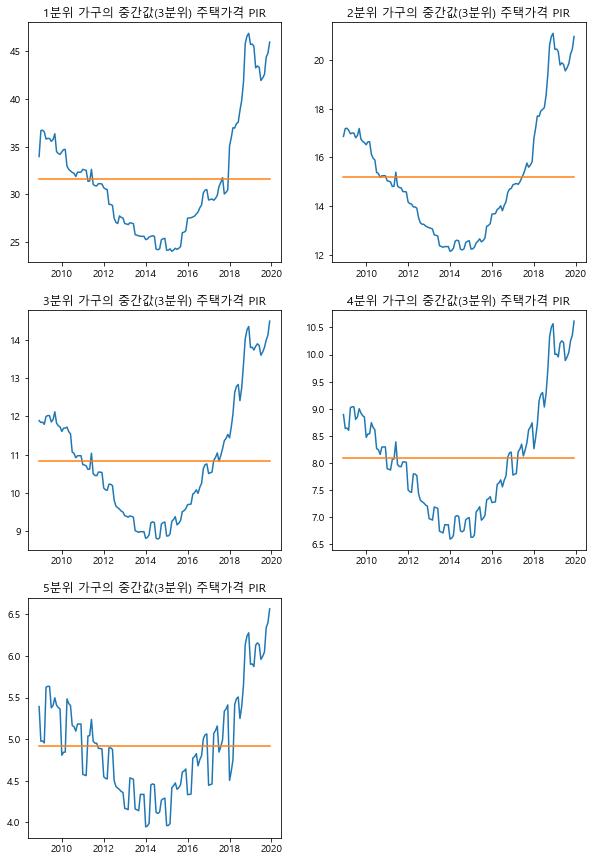

In [66]:
# PIR 그래프에 평균값 추가하기

gagus = ['1분위', '2분위', '3분위', '4분위', '5분위']
location = '서울 Seoul'
house_price_level = '3분위'
num_row = int((len(gagus)-1)/2)+1

plt.figure(figsize=(10, num_row*5))
for i, gagu in enumerate(gagus):
    plt.subplot(num_row, 2, i+1)
    plt.title(gagu + " 가구의 중간값(" + house_price_level + ") 주택가격 PIR")
    plt.plot(pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu])
    index = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].index
    long_mean = pir_rawdata.xs(house_price_level, level='평균주택가격')[location][gagu].mean()
    plt.plot(index, [long_mean for a in range(len(pir_rawdata.xs(house_price_level,
                                                                level='평균주택가격')[location][gagu]))])
    

plt.show()


indx 는 PIR 평균값의 x 값들을 만드는 코드이고, y 값은 평균값에 mean() 함수를 이용한다. 그리고 평균값을 나타내는 직선은 index 숫자만큼 평균값이 들어 있는 리스트를 생성해 plot 함수에 y 값으로 지정한다.